#Anscombe's Quartet (Quarteto de Anscombe)
Notebook obtido em: https://github.com/psychemedia/ou-tm351/tree/master/notebooks-RFC
traduzido e adaptado para a aula de Análise Exploratória de Dados da disciplina Data Mining INE5644 

Prof. Dr. Jônata Tyska Carvalho - INE / CTC / UFSC 

No artigo, *Graphs in Statistical Analysis*, publicado em 73 na revista científica *The American Statistician*, Vol. 27, No. 1. (Feb., 1973), pp. 17-21, o estatístico Francis Anscombe forneceu o mais breve dos resumos: *"Gráficos são essenciais para uma boa análise estatística"*.

Seu artigo iniciou uma breve reflexão sobre *a utilidade dos gráficos*:

<em>A maioria dos livros texto em métodos estatísticos, e a maioria dos programas de estatística, prestam pouca atenção à visualização. Poucos estatísticos escapam não doutrinados a respeito de algumas noções:


1. cálculos numéricos são exatos, mas gráficos são imprecisos; 
2. para qualquer tipo de dado estatístico existe um conjunto de cálculos que constitutem a correta análise estatística; 
3. realizar cálculos complexos é virtuoso, enquanto simplesmente visualizar os dados é enganador. 
</em>
Um computador deve fazer ambos cálculos e visualizações gráficas. Ambos devem ser estudados, cada um fornecendo sua contribuição para o entendimento dos dados. 

Gráficos podem ter vários propósitos, como: (i) nos ajudar a perceber de forma mais ampla certas características dos dados, (ii) nos permite investigar melhor tais características e descobrir mais a respeito delas. A maior parte dos cálculos estatísticos se baseiam em premissas a respeito do comportamento dos dados. Essas premissas podem ser falsa, e então os cálculos podem ser enganadores. Temos sempre que testar se as premissão são razoavelmente corretas, e se elas forem equivocadas temos que tentar perceber de forma elas estão erradas. Gráficos são muito importantes para estes fins.
purposes.

Uma boa análise estatística não é puramente uma questão de rotina, e geralmente requer mais do que uma passagem dos dados pelo computador. A análise deve ser sensível tanto a característica peculiares nos dados e também a qualquer informação de pano de fundo (background) disponível a respeito das variáveis. As informações de *background* são particularmente úteis para descobrir formas alternativas de realizar análises. Pensamento e engenhosidade dedicados a inventar boas formas de visualizar os dados costumam valer a pena. Muitas ideias podem ser buscadas na literatura.


Para ilustrar o seu "chamado para a batalha (*call to arms)*" Anscombe gerou um conjunto de 4 conjuntos de dados pareados simples (conjuntos I, II, II, IV abaixo com cada um dos valores de *x* e *y*) com o objetivo de demonstrar a utilidade da visualização gráfica.

In [ ]:
import pandas as pd

Carregamento dos dados do Anscome's quartet para um dataframe hierarquicamente indexado.

In [ ]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

data = StringIO("""group,I,I,II,II,III,III,IV,IV
var,x,y,x,y,x,y,x,y
,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89""")

aq=pd.read_csv(data,header=[0,1],index_col=[0])
aq

group     I           II         III           IV       
var       x      y     x     y     x      y     x      y
0      10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1       8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2      13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3       9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4      11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5      14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6       6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7       4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8      12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9       7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10      5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

A sumarização estatística das propriedades dos conjuntos I e IV praticamente não variam. As médias são idênticas para *x* e *y* entre todos os grupos, e as variâncias são indistinguíveis em qualquer sentido. 

In [ ]:
aq.mean()

group  var
I      x      9.000000
       y      7.500909
II     x      9.000000
       y      7.500909
III    x      9.000000
       y      7.500000
IV     x      9.000000
       y      7.500909
dtype: float64

In [ ]:
aq.var()

group  var
I      x      11.000000
       y       4.127269
II     x      11.000000
       y       4.127629
III    x      11.000000
       y       4.122620
IV     x      11.000000
       y       4.123249
dtype: float64

Outras estatísticas como linhas de regressão apresentam as mesmas características.

Então do ponto de vista da sumarização estatística, nós concluímos que os conjuntos de dados são iguais para todos os propósitos e efeitos.

Mas e se visualizarmos os dados?

A forma mais natural de olhar para os dados é usar um gráfico de dispersão "scatterplot", com o valores de *x* apresentandos ao longo do eixo horizontal e os valores de *y* apresentados ao longo do eixo vertical. Os pontos são mostrados em figuras diferentes para cada um dos grupos. 


##Visualizando o Anscombe's Quartet usando matplotlib
código obtido em https://matplotlib.org/3.2.2/gallery/specialty_plots/anscombe.html

Agora nós podemos finalmente ver o quão distintos são os conjuntos de dados, cada um contando suas próprias histórias, mas não histórias que nós conheceríamos se tivéssemos olhado apenas para as estatísticas sumarizadas. As linhas vermelhas são retas obtidas através da aplicação de um método de regressão linear.

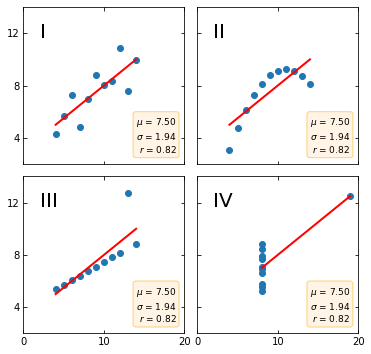

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)
    x_lin = np.array([np.min(x), np.max(x)])
    y_lin = p1 * x_lin + p0
    ax.plot(x_lin, y_lin, 'r-', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

##Summary

Apesar do Anscombe's quartet, apresentar pequenos conjuntos de dados ele oferece uma ótima lição. A sumarização estatística para *x* e *y* ao longo dos grupos pode ser a mesma, e uma olhada rápida nos dados brutos pode não ser muito informativo. Entretanto, quando visualizados, temos a certeza que cada grupo dos dados conta uma história diferente.


Anscombe conclui o seu artigo da seguinte maneira:

<blockquote>Graphical output such as described above is readily available to anyone who does his own programming. I myself habitually generate such plots at an APL terminal, and have come to appreciate their importance. A skilled Fortran or PL/1 programmer, with an organized library of subroutines, can do the same (on a larger scale). Unfortunately, most persons who have recourse to a computer for statistical analysis of data are not much interested either in computer programming or in statistical method, being primarily concerned with their own proper business. Hence the common use of library programs and various statistical packages. Most of these originated in the pre-visual era. The user is not showered with graphical displays. He can get them only with trouble, cunning and a fighting spirit. It's time that was changed.</blockquote>

Parte deste material foi traduzido e adaptado a partir do notebook de Tony Hirst.

**DO NOT REMOVE THIS NOTICE/CELL FROM THIS IPYTHON NOTEBOOK**

**This notebook was prepared for use in a course on data analysis and data management due to be released by The Open University in October 2015 and is made available *AS IS, and IN DRAFT FORM ONLY*. It may be used *for educational purposes only*.**

----

*Comments to: tony.hirst@open.ac.uk*